# Code for Training and Saving the models as pickle files

In [9]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('D:/CropSense-ML-main/data/data_processed/crop_recommendation_merged_dataset.csv')

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,40,40,24.886928,71.917115,7.319735,150.249867,jute
1,93,51,43,24.806250,82.092817,6.356296,156.361617,jute
2,78,52,35,23.584193,72.004608,6.090060,190.424216,jute
3,69,42,41,26.213128,81.704764,6.667633,180.123776,jute
4,63,59,41,24.307486,78.543410,6.186814,186.233757,jute


In [12]:
df.size

17600

In [13]:
df.shape

(2200, 8)

In [14]:
df['label'].value_counts()

label
jute           100
muskmelon      100
banana         100
chickpea       100
pigeonpeas     100
orange         100
grapes         100
papaya         100
lentil         100
blackgram      100
apple          100
cotton         100
rice           100
pomegranate    100
mungbean       100
maize          100
mothbeans      100
coconut        100
watermelon     100
kidneybeans    100
mango          100
coffee         100
Name: count, dtype: int64

In [15]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [16]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [17]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  93.63636363636364
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        28
   blackgram       0.62      1.00      0.77        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       0.96      1.00      0.98        22
      cotton       0.93      1.00      0.96        26
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.19      0.32        16
 kidneybeans       1.00      0.86      0.92        14
      lentil       0.96      1.00      0.98        23
       maize       0.85      0.69      0.76        16
       mango       1.00      0.95      0.98        21
   mothbeans       1.00      0.71      0.83        24
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [21]:
score

array([0.925     , 0.925     , 0.92954545, 0.93636364, 0.94772727])

### Saving the trained Decision Tree Model

In [22]:
import pickle
# Dump the trained DecsionTree model with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        22
      cotton       0.96      1.00      0.98        26
      grapes       1.00      1.00      1.00        29
        jute       0.94      1.00      0.97        16
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.94      0.97        16
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00 

In [24]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99772727, 0.99318182])

### Saving the Naive Bayes Classifier

In [25]:
# Save the trained Guassian Naive Bayes model

import pickle
# Dump the trained Guassian Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# SVM(Support Vector Machine) Classifier

In [26]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        29
        jute       0.89      1.00      0.94        16
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      0.96      0.96        23
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.0

In [27]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98636364, 0.97954545, 0.98181818, 0.98863636, 0.97045455])

### Saving the trained SVM model

In [28]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        22
      cotton       0.96      1.00      0.98        26
      grapes       1.00      1.00      1.00        29
        jute       1.00      1.00      1.00        16
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.94      0.97        16
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99545455, 0.99545455, 0.99772727, 0.99318182])

### Saving the trained Random Forest model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

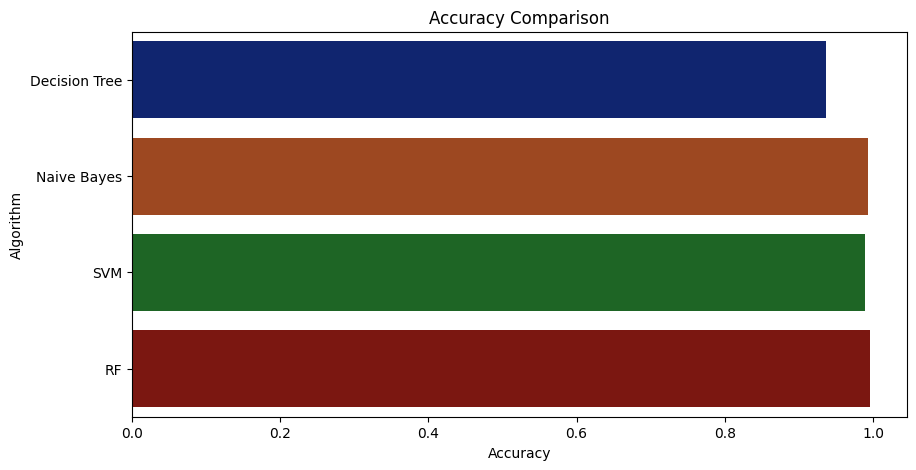

In [32]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

## Print accuracy of all models

In [33]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9363636363636364
Naive Bayes --> 0.9931818181818182
SVM --> 0.9886363636363636
RF --> 0.9954545454545455


# Making a prediction

In [34]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']
